# Centralni granični teorem

In [1]:
import numpy as np; from numpy import *
import numpy.random as rnd;
import matplotlib.pyplot as plt
import ipywidgets as widgets; from ipywidgets import *
from shared import *
from gauss import *
from clt import *
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)

In [2]:
def visualize_binomial(n, approx):
    plot_binomial(n ,approx)
    plt.plot()
interact(visualize_binomial,
         n=IntSlider(1,1,100),
         approx=['Auto', 'True', 'False']);

interactive(children=(IntSlider(value=1, description='n', min=1), Dropdown(description='approx', options=('Aut…

In [3]:
def clt(N1):
    N = 100000 # Veličina populacije
    #N1 = 2 # Veličina slučajnog uzorka
    rv_x = rnd.rayleigh(1, size=N) # Populacija

    N_uzoraka = int(N / N1)

    # Niz koji će sadržavati srednje vrijednosti svakog uzorka
    means = empty(N_uzoraka);
    rv_mean = rv_x.mean()

    rnd_pop = rnd.choice(range(N), N, replace=False)

    for i in range(N_uzoraka):
        means[i] = rv_x[rnd_pop[i*N1:min((i+1)*N1, N)]].mean()

    print(rv_mean, means.mean())

    plt.hist(rv_x, bins=40, density=True, label='X')
    plt.hist(means, bins=40, density=True, label='Means')
    plt.plot([rv_mean, rv_mean], array(plt.ylim()))
    plt.legend()
    plt.show()
interact(clt, N1=IntSlider(10, min=1, max=100));

interactive(children=(IntSlider(value=10, description='N1', min=1), Output()), _dom_classes=('widget-interact'…

In [4]:
interact(clt, N1=IntSlider(min=1000, max=10000));

interactive(children=(IntSlider(value=1000, description='N1', max=10000, min=1000), Output()), _dom_classes=('…

In [5]:
## Osobina konvolucije (TODO name)
A = [1,2,3]
print(concatenate((A,A)))

[1 2 3 1 2 3]


In [6]:
def visualize_convolution(n, tip):
    # Ulazna funkcija
    plt.subplot(2,1,1)
    f = gen_fun(tip)
    plot_fun(f)
    
    # Konvolucija
    plt.subplot(2,1,2)
    plot_convolution(f, n)
    plt.tight_layout(); plt.show()
    
# Napomena: Povećavanje n iznad preporučenog maksimuma može dovesti do
# numeričkih problema
interact(visualize_convolution, n=IntSlider(1, min=1, max=20),
         tip=['rect', 'noise_uniform', 'noise_exp', 'exp', 'exp2']);

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Dropdown(description='tip', options=…

## Obojeno uzorkovanje

In [7]:
"""
Izvlačenje uzoraka iz populacije i grafički prikaz.
N - Veličina populacije
N1 - Veličina uzorka
"""
def uzorkovanje(N1, N=1e4, oboji=True, randomiziraj=True, pojedinacni_pdf=True, pdf=False):

    Ns = int(N / N1) # Broj uzoraka
    N = Ns * N1 # Radi jednostavnosti se N stavlja da bude djeljivo sa N1
    x = rnd.uniform(0,1, size=N) # Generisanje populacije

    if not randomiziraj:
        x = sort(x)
        
    # Formiranje uzoraka
    uzorci = x.reshape(Ns, N1)
    
    plt.figure()
    
    # Crtanje populacije (različitim bojama ili sve u istoj boji)
    plt.subplot(3,1,1)
    if oboji:
        for i in range(Ns):
            plt.scatter(range(N1), uzorci[i])
    else:
        plt.scatter(range(N), x)

    i = 2 # indeks subplot-a [*] 

    if pojedinacni_pdf:
        plt.subplot(3,1,2)
        i = i + 1 # [*] koristi se ovdje
        if oboji:
            plt.hist(transpose(uzorci), stacked=True, density=True)
        else:
            plt.hist(x, bins=30)
        
    # Crtanje srednjih vrijednosti uzoraka
    if pdf:
        plt.subplot(3,1,i) # [*] koristi se ovdje
        plt.hist(mean(uzorci, axis=1), bins=40, density=True)
        Ex = x.mean() # Očekivana vrijednost od x
        plt.plot([Ex, Ex], list(plt.ylim()), label='Sr.vr. populacije')
        Eu = uzorci.mean() # Srednja vrijednost očekivanih vrijednosti populacije
        plt.plot([Eu, Eu], list(plt.ylim()), label='Sr.vr. oč. vrijednosti uzoraka')
        plt.legend()
        
    plt.show()
    

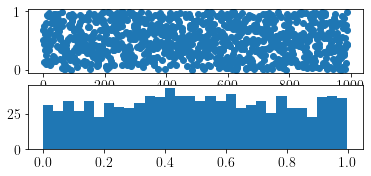

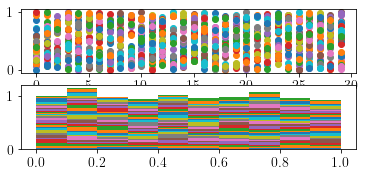

In [8]:
uzorkovanje(30, 1000, oboji=False)
uzorkovanje(30, 1000)

In [11]:
interact(uzorkovanje,
         N1=IntSlider(20, 1,1000),
         N=IntSlider(10000, 1,1e5),
         oboji=fixed(False),
         randomiziraj=True,
         pojedinacni_pdf=fixed(False),
         pdf=fixed(True)
        );

interactive(children=(IntSlider(value=20, description='N1', max=1000, min=1), IntSlider(value=10000, descripti…

## Bonus

In [10]:
# Fourierova transformacija
import scipy.fft as fft

def fft_n(n, tip):
    x = gen_fun(tip)
    #w = linspace(-10, 10, 10000)
    w = arange(-50, 50)
    
    
    X = sinc(w)
    X = abs(fft.fftshift(fft.fft(x)))
    Y = X**n / 100
    Y_approx = approx_gaussian(w, Y)

    plt.subplot(2,1,1)
    plt.plot(arange(-50, 50), x)
    plt.subplot(2,1,2)
    plt.plot(w, Y_approx, label='Aproksimacija')
    plt.plot(w, abs(Y), label='F.T.')
    plt.legend(bbox_to_anchor=(0.55,1), framealpha=1); plt.show()
interact(fft_n,
         n=widgets.IntSlider(2, 2, 10, step=2),
         tip=['rect', 'noise_uniform', 'noise_exp', 'exp']
         );

interactive(children=(IntSlider(value=2, description='n', max=10, min=2, step=2), Dropdown(description='tip', …